In [184]:
#-*- coding:utf-8 -*-

import pandas as pd
import numpy as np
import numpy
from PIL import Image

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.style.use("ggplot") 

import jieba.analyse
from wordcloud import WordCloud  # 词云包

# import re

import sys
# Python2.5初始化后会删除 sys.setdefaultencoding 这个方法，需要重新载入 
reload(sys)   
sys.setdefaultencoding('utf-8')

font_set = FontProperties(fname=r"Songti.ttc", size=10) 

df = pd.read_excel("playone.xlsx", encoding="utf-8")
df.head()

In [185]:
df.info(),df.shape

(None, (440, 6))

In [186]:
df.describe()

,agree_num
count,440.000000
mean,204.390909
std,819.652258
min,0.000000
25%,0.000000
50%,12.000000
75%,60.250000
max,8628.000000


In [187]:
# 处理缺失值
df = df.dropna()
df.head()

,comment,comment_time,score,agree_num,user_name,is_view
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,2018-03-27 23:02:00,力荐,8628,影志,看过
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,2018-03-21 17:08:00,力荐,7673,翻滚吧！蛋堡,看过
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,2018-03-28 08:35:00,力荐,5575,凌睿,看过
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,2018-03-26 23:47:00,力荐,5119,杨欢喜Metiche,看过
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,2018-03-21 19:45:00,力荐,4466,风间隼,看过


Text(0.5,1,u'\u8c46\u74e3\u7f51\u53cb\u5bf9\u7535\u5f71\u300a\u5934\u53f7\u73a9\u5bb6\u300b\u7684\u8bc4\u5206\u5206\u5e03\u60c5\u51b5')

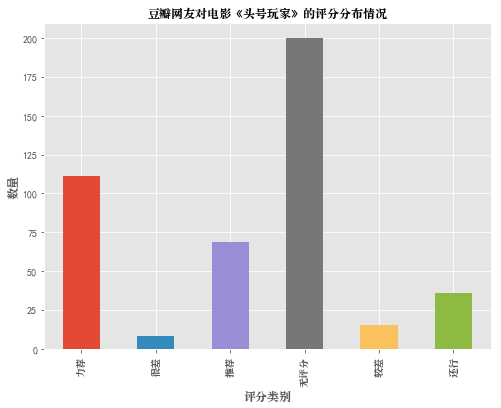

In [188]:
# 五星评分分布情况，由下图可以看出，其中抛开“无评分”，《头号玩家》拿到8.9分是
# 有道理的，大多数豆瓣网友对《头号玩家》的评分为5星，其次为4星，3星，2星，1星

ax = df.groupby('score')['score'].agg(len).plot.bar()
for label in ax.get_xticklabels():
    label.set_fontproperties(font_set)
    
plt.xlabel(u'评分类别',size=12,fontproperties=font_set)
plt.ylabel(u'数量',size=12,fontproperties=font_set)
plt.title(u'豆瓣网友对电影《头号玩家》的评分分布情况',size=12,fontproperties=font_set)

In [189]:
df['score'].value_counts() # 按照数量从大到小输出

无评分    200
力荐     111
推荐      69
还行      36
较差      15
很差       8
Name: score, dtype: int64

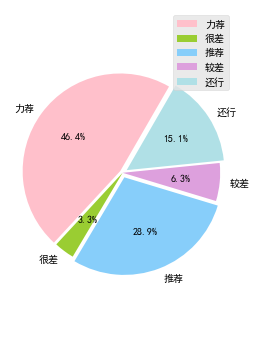

In [190]:
# 筛选掉“无评分”那部分数据，只有isin方法，~表示取反
scorea = ~df['score'].isin([u'无评分'])
a = df[scorea].groupby('score')['score'].agg(len)
print a

plt.figure(figsize=(4,6)) #调节图形大小
labels = [u'力荐',u'很差',u'推荐',u'较差',u'还行'] 
plt.rcParams['font.sans-serif']=['SimHei'] #解决中文乱码
colors = ['pink','yellowgreen','lightskyblue','plum','powderblue']
explode=(0.03,0,0.05,0,0.05) #将饼图分割出来，值越大分割的间隙越大

plt.pie(a, explode=explode, colors=colors, labels=labels, startangle=60,autopct='%1.1f%%')

# x，y轴刻度设置一致，此时的饼图才是圆形
plt.axis('equal')
plt.legend()
plt.show()

In [191]:
# 按照评分类别进行汇总
score_num = df.groupby('score')['score'].agg(len)
score_num

score
力荐     111
很差       8
推荐      69
无评分    200
较差      15
还行      36
Name: score, dtype: int64

In [192]:
df[['score','agree_num']].head(6)

,score,agree_num
0,力荐,8628
1,力荐,7673
2,力荐,5575
3,力荐,5119
4,力荐,4466
5,推荐,3942


In [193]:
# 认为有用的人数最多对应的影评，一般来说，评分打得高说明其对电影的评价比较用心，走心，故而
# 网友对其点赞数最多，所以筛选出评分在5颗星，4颗星以及3颗星对应的影评即可

scorea = df['score'].isin([u'力荐',u'推荐',u'还行'])  # scorea为布尔值

# 只选取影评，认为有用的人数，评分3个字段，按照认为有用的人数从大到小排序，输出前15个
df[['comment','agree_num','score']][scorea].sort_values(by='agree_num',ascending=False)[:10]

,comment,agree_num,score
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,8628,力荐
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,7673,力荐
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,5575,力荐
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,5119,力荐
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,4466,力荐
7,好想在有生之年玩一场全民大战马化腾\n,4039,力荐
5,9。我爱这部电影，就好像我的梦想是能进入马丁·斯科塞斯的《出租车司机》，看罗伯特德尼罗枪杀嫖...,3942,推荐
6,走马观花的IP大赏，剧情人物基本不通，鸡汤也撒得不知所云。适合跟塑料姐妹们一起假嗨\n ...,3845,还行
9,这片讲述了“绿洲五人组”寻找终极彩蛋之旅：第一关告诉你，有时退一步，就是海阔天空；第二关告...,3236,力荐
8,它是你们的情书，我的命。\n,3196,力荐


In [194]:
# 对数据表按comment_time进行升序排列，ascending参数的默认值是True，也就是升序
df.sort_values(['comment_time'],ascending=True)[:6]

,comment,comment_time,score,agree_num,user_name,is_view
234,17年，等死我算了,2014-12-23 15:24:00,无评分,0,AROBTTH,想看
392,这么多导演是几个意思\n \n,2015-01-07 16:03:00,无评分,0,张迪,想看
311,看简介还有导演就想看了~~\n,2015-01-20 18:28:00,无评分,0,橘安,想看
17,唔，华纳没弄来你们的诺神，Steven Spielberg to Direct Sci-F...,2015-03-26 05:26:00,无评分,12,大炎,想看
68,很朋克的感觉，想看。20160304,2016-03-04 17:23:00,无评分,0,浩浩洪流,想看
314,我要是剧透发这 你们会恨我吗\n,2016-05-15 01:02:00,无评分,0,薰华,想看


In [195]:
# 筛选出is_view为“看过”的数据
df[['comment','is_view']][df['is_view']==u'看过'].head()

# 或者 ： df.loc[df['is_view']==u'看过',['comment','is_view']].head()

,comment,is_view
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,看过
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,看过
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,看过
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,看过
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,看过


In [196]:
# 评分时间分布情况


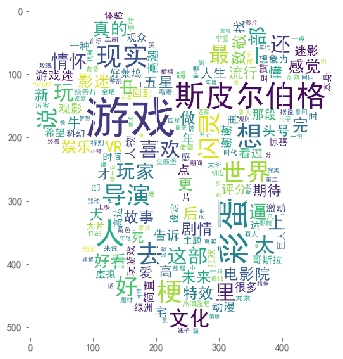

In [197]:
# 总体评分词云

# com = np.array(df['comment'])
comment_arr = []
for item in df['comment']:
    comment_arr.append(item)

comments = ''
for k in range(len(comment_arr)):
    # 将comment_arr[k]字符串化，并去除两边的空格以及换行符
    comments = comments + str(comment_arr[k]).strip().replace("\n", "")

# 使用正则表达式去除标点符号                  
# pattern = re.compile(u'[\u4e00-\u9fa5]+')
# filterdata = re.findall(pattern, comments)
# comments = ''.join(filterdata)

# comment = re.sub("[\s+\.\!\/_,$%^*(+\"\‘)]+|[+——()?【】《》<>,“”！，...。？、~@#￥%……&*（）]+".decode("utf8"), "",comments)

# 使用结巴分词进行中文分词
seg = jieba.lcut(comments)
words = pd.DataFrame({'segment': seg})

# 去掉停用词
stopwords = pd.read_csv("stopwords.txt", index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8')
words = words[~words.segment.isin(stopwords.stopword)]

# 统计词频
word_stat = words.groupby(by=['segment'])['segment'].agg({"计数":np.size})
word_stat = word_stat.reset_index().sort_values(by=["计数"], ascending=False)

# 用词云进行显示
back_png = numpy.array(Image.open("back.jpg"))
wordcloud = WordCloud(font_path="simhei.ttf",mask=back_png, background_color="white", 
                      max_font_size=85)
word_frequence = {x[0]: x[1] for x in word_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.show()

In [198]:
# 评分相对不错的词云（包括力荐，推荐，还行）
score_good = df['score'].isin([u'力荐',u'推荐',u'还行'])
df[['comment','score']][score_good].head()

,comment,score
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,力荐
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,力荐
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,力荐
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,力荐
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,力荐


In [199]:
# 评分相对较差的词云（包括较差，很差）
score_bad = df['score'].isin([u'较差',u'很差'])
df[['comment','score']][score_bad].head()

,comment,score
10,好莱坞把圈钱手段做到了极致，情怀，英雄，动漫，怀旧，复古只要能圈钱，什么都行，这部片子，就...,很差
43,梗的设置就会给普通观众设置很大的门槛。这个电影最大的乐趣是找梗这也是影迷的嗨点。但是除了梗...,较差
46,内部票，比公映提前两天看到。整个就觉得很幼稚无聊，大概一些nerds会很喜欢吧。电影结束响...,较差
48,我还是对斯皮尔伯格的童心不感冒，看到鸡汤结局就觉得fine，ok你说的都对。而我大概也不算...,较差
52,言过其实，华而不实。\n,很差
